# Import

In [0]:
!pip install -q seaborn

from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
from sklearn.model_selection import train_test_split


print(tf.__version__)

1.15.0


# Importing the dataset and preprocessing

In [0]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model', 'origin', 'car_name'])
print(data.shape)
data = data.dropna()
print(data.shape)
print(data.head)

data.pop('car_name')
true_mpg = data.pop('mpg')
print(data.shape)
print(data)

print(len(true_mpg))

(406, 9)
(392, 9)
<bound method NDFrame.head of       mpg  cylinders  displacement  ...  model  origin                   car_name
0    18.0        8.0         307.0  ...   70.0     1.0  chevrolet chevelle malibu
1    15.0        8.0         350.0  ...   70.0     1.0          buick skylark 320
2    18.0        8.0         318.0  ...   70.0     1.0         plymouth satellite
3    16.0        8.0         304.0  ...   70.0     1.0              amc rebel sst
4    17.0        8.0         302.0  ...   70.0     1.0                ford torino
..    ...        ...           ...  ...    ...     ...                        ...
401  27.0        4.0         140.0  ...   82.0     1.0            ford mustang gl
402  44.0        4.0          97.0  ...   82.0     2.0                  vw pickup
403  32.0        4.0         135.0  ...   82.0     1.0              dodge rampage
404  28.0        4.0         120.0  ...   82.0     1.0                ford ranger
405  31.0        4.0         119.0  ...   82.0    

In [0]:
data.describe()

,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, true_mpg ,test_size=0.2)

print(X_train, y_train)
print(X_test, y_test)

X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()


     cylinders  displacement  horsepower  weight  acceleration  model  origin
287        6.0         231.0       115.0  3245.0          15.4   79.0     1.0
15         8.0         383.0       170.0  3563.0          10.0   70.0     1.0
274        4.0         134.0        95.0  2560.0          14.2   78.0     3.0
196        8.0         304.0       120.0  3962.0          13.9   76.0     1.0
78         3.0          70.0        97.0  2330.0          13.5   72.0     3.0
..         ...           ...         ...     ...           ...    ...     ...
345        4.0         135.0        84.0  2490.0          15.7   81.0     1.0
197        8.0         351.0       152.0  4215.0          12.8   76.0     1.0
162        6.0         250.0        72.0  3158.0          19.5   75.0     1.0
224        4.0         111.0        80.0  2155.0          14.8   77.0     1.0
149        4.0          79.0        67.0  1963.0          15.5   74.0     2.0

[313 rows x 7 columns] 287    21.5
15     15.0
274    27.5
196 

# ANN Model

In [0]:
model = tf.keras.Sequential([
    
      tf.keras.layers.Flatten(input_shape=[len(X_train.keys())]),
      tf.keras.layers.Dense((313*7), activation=tf.nn.relu),

      tf.keras.layers.Dense(1024, activation=tf.nn.relu),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Dense(128),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      

      tf.keras.layers.Dense(1)
  ])

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error', 'mean_squared_error'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_37 (Dense)             (None, 2191)              17528     
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              2244608   
_________________________________________________________________
batch_normalization_14 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_39 (Dense)             (None, 128)               131200    
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
activation_15 (Activation)   (None, 128)              

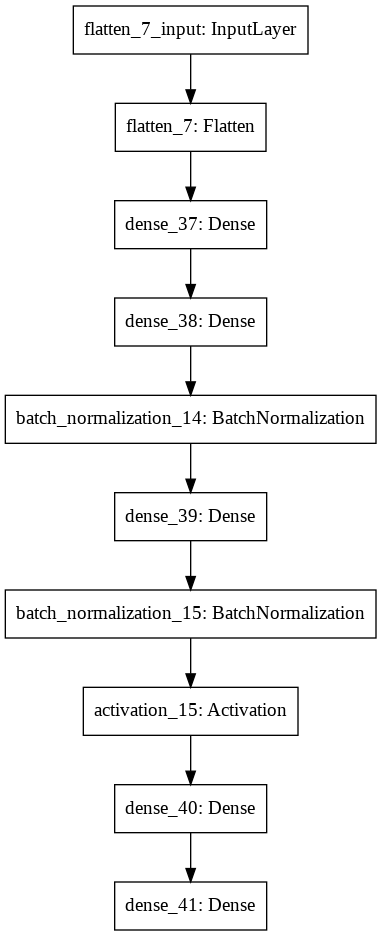

In [0]:
model.summary()
tf.keras.utils.plot_model(model,to_file='model.png',show_layer_names=True)

In [0]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1,shuffle=True,verbose=1)

Train on 281 samples, validate on 32 samples
Epoch 1/50
281/281 [==============================] - 0s 1ms/sample - loss: 531.0893 - mean_absolute_error: 22.0776 - mean_squared_error: 531.0894 - val_loss: 477.7864 - val_mean_absolute_error: 20.9025 - val_mean_squared_error: 477.7864
Epoch 2/50
281/281 [==============================] - 0s 175us/sample - loss: 377.5072 - mean_absolute_error: 18.7131 - mean_squared_error: 377.5073 - val_loss: 411.6116 - val_mean_absolute_error: 19.5396 - val_mean_squared_error: 411.6116
Epoch 3/50
281/281 [==============================] - 0s 175us/sample - loss: 273.7113 - mean_absolute_error: 15.8720 - mean_squared_error: 273.7114 - val_loss: 345.3669 - val_mean_absolute_error: 18.0617 - val_mean_squared_error: 345.3669
Epoch 4/50
281/281 [==============================] - 0s 182us/sample - loss: 178.9211 - mean_absolute_error: 12.7861 - mean_squared_error: 178.9211 - val_loss: 283.3900 - val_mean_absolute_error: 16.4285 - val_mean_squared_error: 283.39

# Plotting And Predictions

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],label = 'Val Error')
  plt.legend()
  plt.show()

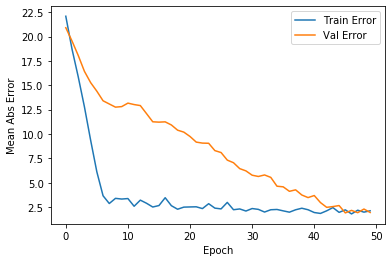

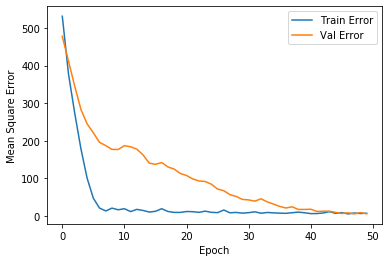

In [0]:
plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=1)

print("Testing set Mean Abs Error:  MPG",mae)

79/79 [==============================] - 0s 151us/sample - loss: 9.2207 - mean_absolute_error: 2.3209 - mean_squared_error: 9.2207
Testing set Mean Abs Error:  MPG 2.3208666


In [0]:
test_predictions = model.predict(X_test).flatten()

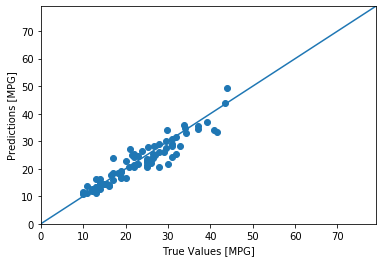

In [0]:
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([0,len(test_predictions)])
plt.ylim([0,len(test_predictions)])
line = plt.plot([-100, 100], [-100, 100])